In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Plot inline
% matplotlib inline

/Users/pavanramkumar/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from neuropop import NeuroPop

### Create a NeuroPop object

In [3]:
n_neurons = 10
pop = NeuroPop(n_neurons, tunemodel='georgopulos', fit_k=True, n_repeats=3, learning_rate=1e-2, random_state=5)

### Simulate a population of neurons

In [4]:
# Simulate a population of neurons
n_samples = 500
x, Y, mu, k0, k, g, b = pop.simulate(pop.tunemodel, n_samples=500, noise_mu=0.0, noise_sigma=2.0)

In [5]:
Y.shape

(500, 10)

### Fit the tuning curves with gradient descent

In [6]:
pop.fit(x, Y)

### Predict the population activity with the fit tuning curves

In [7]:
Yhat = pop.predict(x)

### Plot the simulated and fit tuning curves

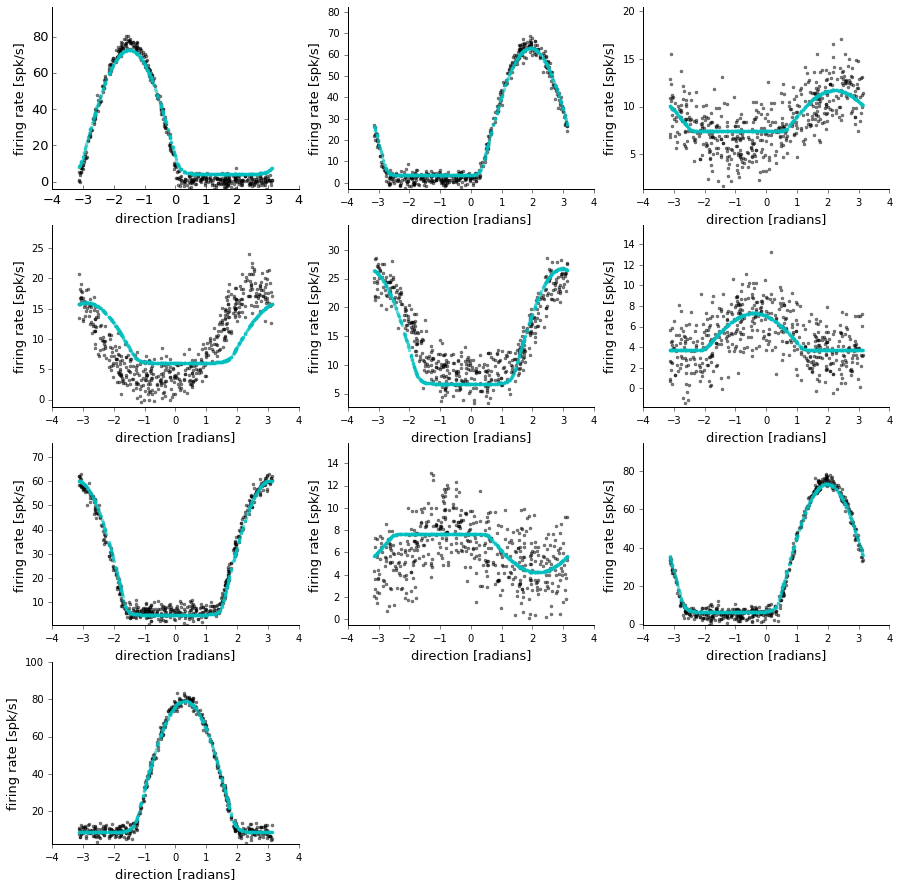

In [8]:
plt.figure(figsize=[15,15])

for neuron in range(n_neurons):
    plt.subplot(4,3,neuron+1)
    pop.display(x, Y[:, neuron], Yhat[:, neuron], ylim=[0.8*np.min(Y[:, neuron]), 1.2*np.max(Y[:, neuron])])

plt.show()

### Decode feature from the population activity

In [9]:
xhat = pop.decode(Y)

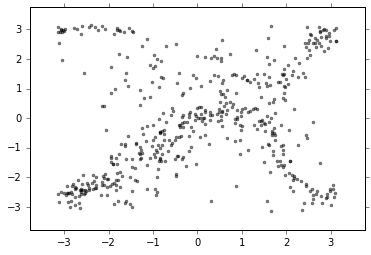

In [10]:
plt.plot(x, xhat, 'k.', alpha=0.5)
plt.xlim([-1.2*np.pi, 1.2*np.pi])
plt.ylim([-1.2*np.pi, 1.2*np.pi])
plt.show()

### Quantify decoding performance

In [11]:
from scipy import stats
def circ_corr(alpha1, alpha2):
    alpha1_bar = stats.circmean(alpha1)
    alpha2_bar = stats.circmean(alpha2)
    num = np.sum(np.sin(alpha1 - alpha1_bar) * np.sin(alpha2 - alpha2_bar));
    den = np.sqrt(np.sum(np.sin(alpha1 - alpha1_bar) ** 2) * np.sum(np.sin(alpha2 - alpha2_bar) ** 2));
    rho = num / den
    return rho


In [12]:
circ_corr(x, xhat)

0.12812204904800187

In [13]:
print x[:5]
print xhat[:5]

[ 0.85046812  1.95974052  2.68092594  2.59261042  2.04084595]
[-0.03585199 -1.57280421  2.41604652 -2.86219437  1.80223781]
